In [3]:
import logging
import sys
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from pypots.utils.logging import logger as pypots_logger
from tsdb.utils.logging import logger

sys.path.append(os.path.abspath('..'))
from src.imputer import Imputer

# silence noisy warnings
warnings.simplefilter("ignore", FutureWarning)

LERP = []
KNN = []

df = pd.read_csv('./src/data/PRSA_Data_Changping_20130301-20170228.csv')
for i in range(20):
    for n in range(2,9):
        i = Imputer(df, independent='PM10', features=['O3', 'TEMP', 'DEWP', 'WSPM', 'NO2', 'SO2'], neighbors=n)
        LERP.append(i.lerp_r_score())
        KNN.append(i.knn_r_score())

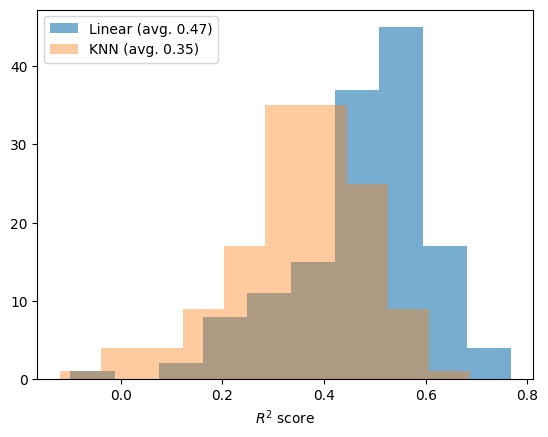

In [17]:
import numpy as np

plt.hist(LERP, alpha=0.6, label=f"Linear (avg. {np.mean(LERP):.2f})")
plt.hist(KNN, alpha=0.4, label=f"KNN (avg. {np.mean(KNN):.2f})")
plt.xlabel("$R^2$ score")
plt.legend()
plt.show()